In [2]:
import os
import pickle
import jieba
import json
import operator
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from datetime import datetime
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

font_path = '../msjh.ttc'
font = font_manager.FontProperties(fname='../msjh.ttc',
                                   weight='bold',
                                   style='normal', size=16)

In [3]:
jieba.set_dictionary('../jieba_data/dict.txt.big')
jieba.load_userdict('../jieba_data/userdict.txt')
stopwords = []
with open('../jieba_data/stopwords.txt', 'r', encoding='UTF-8') as file:
    for each in file.readlines():
        stopwords.append(each.strip())
    stopwords.append(' ')

stopwords[:20]

Building prefix dict from /Users/kittychen0117/Desktop/Kitty/NTU/107-2/Fintech-Text Mining and Machine Learning/HW0/Political-News-Analysis/jieba_data/dict.txt.big ...
Loading model from cache /var/folders/mq/8nbd7rkj7rg8lb_84m9cnvk80000gn/T/jieba.u6981451bf2d4410294ddb2b5a86623c8.cache
Loading model cost 2.721 seconds.
Prefix dict has been built succesfully.


['\ufeff',
 '',
 '$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《']

In [4]:
with open('../crawler/data/new_talk.pkl', 'rb') as f:
    data = pickle.load(f)
    
data = data[::-1]
contents = [news['content'] for news in data]

In [5]:
names = []
with open('../data/names.txt', 'r', encoding='utf-8-sig') as f:
    names = f.read().split('\n')
    
events = []
with open('../data/events.txt', 'r', encoding='utf-8-sig') as f:
    events = f.read().split('\n')

In [6]:
def remove_punctuation(content_string, user_pc=False):
    if(user_pc):
        punctuation = user_pc
    else:
        punctuation=list("!@#$%^&*()_+=-[]`~'\"|/\\abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.;{}\r\xa0\u3000、，。「」！？；：<>")
        
    for p in punctuation:
        content_string = content_string.replace(p, " ")
    return(content_string)

def remove_stopwords_from_dict(word_dict, stopwords):
    for w in stopwords:
        word_dict.pop(w, word_dict)
    return word_dict

def lcut_to_dict(lcut):
    word_dict = dict(Counter(lcut))
#     word_dict.pop(' ')
    return(remove_stopwords_from_dict(word_dict, stopwords))

def sort_dict_by_values(d):
    return(sorted(d.items(), key=lambda x: x[1], reverse=True))


In [7]:
def news_containing_keyword(keyword, news_list):
    return list(filter(lambda news: keyword in news, news_list))

def data_containing_keyword(keyword, data):
    return list(filter(lambda news: keyword in news['cutted_dict'].keys(), data))

def news_containing_keywords(keywords, news_list):
    news = news_list
    for keyword in keywords:
        news = news_containing_keyword(keyword, news)
        
    return news

In [8]:
# add cutted dict to each news
for i in range(len(data)):
    current_content = data[i]['content']
    current_cutted = jieba.lcut(remove_punctuation(current_content))
    data[i]['cutted_dict'] = lcut_to_dict(current_cutted)
    

## Coshow

In [9]:
def get_coshow(content):
    coshow_dict = {}
    cat_content = ' '.join(contents[:100])
    clean_content = remove_punctuation(cat_content)
    cut_content = jieba.lcut(clean_content)
    cut_content = list(filter(lambda x: x!=' ', cut_content))
    for i in range(len(cut_content)-1):
        wcw = cut_content[i] + cut_content[i+1]
        #print(wcw)
        try:
            coshow_dict[wcw] = coshow_dict[wcw] + 1
        except:
            coshow_dict[wcw] = 1
    sdbv = sort_dict_by_values(coshow_dict)
    return sdbv

In [10]:
# # output possible words to txt
import codecs
# get_sdbv
sdbv = get_coshow(contents)
list_sdbv = [x[0] for x in sdbv]
with codecs.open('t.txt', 'w', 'utf-8') as f:
    f.write('\n'.join(list_sdbv))

## Count words

In [11]:
def get_cutted_dict(list_of_news):
    cat = ' '.join(list_of_news)
    cat = remove_punctuation(cat)
    cutted = jieba.lcut(cat)
    return lcut_to_dict(cutted)

def first_n_words(cutted_dict, n, word_len=2, to=1000):
    sdbv = sort_dict_by_values(cutted_dict)
    return list(filter(lambda x: len(x[0])>=word_len and len(x[0])<=to, sdbv))[:n]

In [12]:
cutted_dict = get_cutted_dict(contents[:1000])
high_freq_pair = first_n_words(cutted_dict, 20)
high_freq_pair

[('台灣', 1380),
 ('國民黨', 783),
 ('侯友宜', 716),
 ('柯文哲', 691),
 ('民進黨', 681),
 ('指出', 600),
 ('中國', 561),
 ('媒體', 541),
 ('選舉', 521),
 ('市府', 501),
 ('希望', 494),
 ('公司', 487),
 ('一個', 469),
 ('美國', 464),
 ('政府', 448),
 ('未來', 413),
 ('提供', 412),
 ('蘇貞昌', 388),
 ('針對', 349),
 ('國家', 337)]

In [13]:
cutted_dict = get_cutted_dict(contents)

In [14]:
# 可能人名
possible_name = first_n_words(cutted_dict, 1000, 3, 3)
# print
possible_name

[('民進黨', 8922),
 ('國民黨', 8420),
 ('柯文哲', 8153),
 ('韓國瑜', 6590),
 ('陳其邁', 4683),
 ('蔡英文', 3738),
 ('蘇貞昌', 3280),
 ('姚文智', 2973),
 ('候選人', 2946),
 ('侯友宜', 2665),
 ('丁守中', 2389),
 ('賴清德', 2362),
 ('記者會', 2286),
 ('台北市', 2082),
 ('行政院', 2033),
 ('馬英九', 1909),
 ('立法院', 1684),
 ('高雄市', 1527),
 ('林佳龍', 1482),
 ('新北市', 1478),
 ('吳敦義', 1389),
 ('中選會', 1379),
 ('支持者', 1378),
 ('促轉會', 1238),
 ('委員會', 1230),
 ('黃偉哲', 1170),
 ('盧秀燕', 1151),
 ('發言人', 1132),
 ('鄭文燦', 1112),
 ('年輕人', 1099),
 ('黃國昌', 1082),
 ('總統府', 1078),
 ('蔡總統', 1064),
 ('吳音寧', 1027),
 ('辦公室', 1011),
 ('11月', 966),
 ('台中市', 937),
 ('黨主席', 926),
 ('朱立倫', 878),
 ('教育部', 871),
 ('管中閔', 867),
 ('外交部', 854),
 ('習近平', 784),
 ('陳水扁', 746),
 ('基金會', 739),
 ('支持度', 706),
 ('參選人', 671),
 ('卓榮泰', 655),
 ('進一步', 649),
 ('涂醒哲', 639),
 ('游盈隆', 631),
 ('陳思宇', 630),
 ('總經理', 630),
 ('市議員', 627),
 ('農委會', 626),
 ('嘉義市', 613),
 ('王金平', 596),
 ('陸委會', 594),
 ('董事長', 567),
 ('12月', 562),
 ('副市長', 551),
 ('黨中央', 545),
 ('假新聞', 545),
 ('交通部', 540),
 ('10

In [15]:
# 可能事件
possible_events = first_n_words(cutted_dict, 200, 4)
# print
possible_events

[('台北市長柯文哲', 1590),
 ('總統蔡英文', 1356),
 ('時代力量', 1135),
 ('九二共識', 1022),
 ('行政院長賴清德', 1003),
 ('中華民國', 852),
 ('競選總部', 779),
 ('蔡英文總統', 762),
 ('競選辦公室', 720),
 ('兩岸關係', 708),
 ('台灣人民', 696),
 ('轉型正義', 693),
 ('2020', 673),
 ('立委補選', 659),
 ('2018', 633),
 ('九合一選舉', 620),
 ('2014', 601),
 ('前總統馬英九', 598),
 ('兩岸一家親', 594),
 ('民進黨立委', 566),
 ('台北市長', 542),
 ('政治人物', 530),
 ('2018年', 481),
 ('民進黨台北市長', 467),
 ('候選人陳其邁', 466),
 ('民進黨高雄市長', 458),
 ('台灣民主', 458),
 ('深澳電廠', 444),
 ('候選人韓國瑜', 442),
 ('高雄市長', 435),
 ('造勢晚會', 428),
 ('台北市政府', 421),
 ('候選人姚文智', 418),
 ('國民黨立委', 412),
 ('競選團隊', 406),
 ('2016年', 403),
 ('行政院長', 401),
 ('一國兩制', 395),
 ('國民黨台北市長', 393),
 ('市長林佳龍', 393),
 ('國民黨主席吳敦義', 384),
 ('立法委員', 383),
 ('議員候選人', 360),
 ('台大校長', 358),
 ('台中市政府', 351),
 ('2020年', 346),
 ('國民黨高雄市長', 335),
 ('高雄市長韓國瑜', 334),
 ('民進黨執政', 329),
 ('媒體報導', 328),
 ('國際社會', 327),
 ('今天上午', 326),
 ('民進黨新北市長', 326),
 ('新北市長', 322),
 ('107年', 321),
 ('候選人丁守中', 311),
 ('2000', 309),
 ('民進黨籍', 305),
 ('雙城論壇', 304)

## Wordcloud

In [16]:
wc = WordCloud(max_font_size=40,
               background_color="white",
               colormap='Set2',
               font_path=font_path,
               width=1000, height=300,
              max_words=1000)

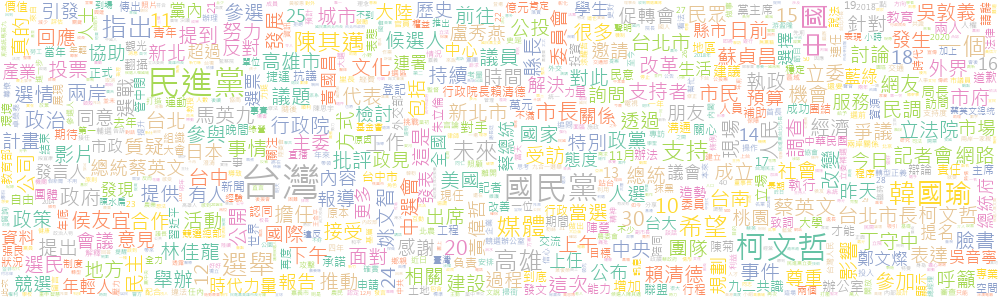

In [17]:
cutted_dict = get_cutted_dict(contents)
high_freq_pair = first_n_words(cutted_dict, 10000)

wc.generate_from_frequencies({word: freq for (word, freq) in high_freq_pair}).to_image()

In [18]:
def get_wordcloud_of_keywords(keywords, list_of_news, image_path=False):
    if type(keywords) == str:
        keywords = [keywords]
    
    if image_path:
        coloring = np.array(Image.open(os.path.join(image_path)))
        color_func = ImageColorGenerator(coloring)
        wc = WordCloud(max_font_size=30,
                       background_color="white",
                       mask=coloring,
                       color_func=color_func,
                       font_path=font_path,
                       width=1000, height=1000,
                      max_words=10000)
    else:
        wc = WordCloud(max_font_size=30,
                       background_color="white",
                       colormap='Set2',
                       font_path=font_path,
                       width=1000, height=300,
                      max_words=1000)
    
    keyword_news = news_containing_keywords(keywords, list_of_news)
    keyword_dict = get_cutted_dict(keyword_news)
    print(len(keyword_dict))
    im = wc.generate_from_frequencies(keyword_dict)
    return im

## 熱門政治人物文字雲

47782


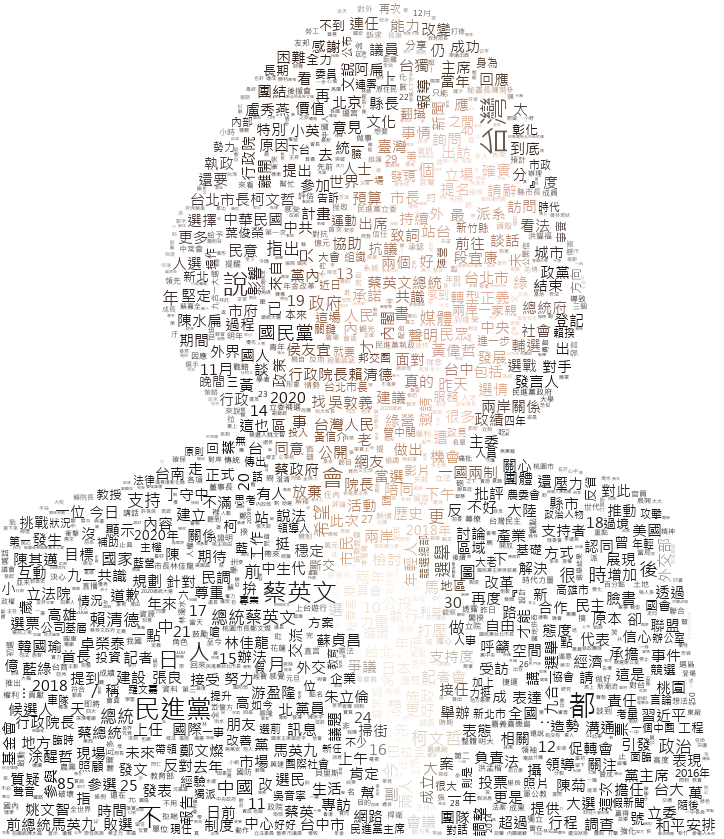

In [18]:
# 蔡英文
ten_wc = get_wordcloud_of_keywords('蔡英文', contents, '../politicians/ten.png')
ten_wc.to_file('../politicians/tenwc.png')
ten_wc.to_image()

In [19]:
news_containing_ten = news_containing_keyword('蔡英文', contents)
ten_dict = get_cutted_dict(news_containing_ten)
first_n_words(ten_dict, 10)

[('台灣', 5039),
 ('民進黨', 3893),
 ('蔡英文', 3738),
 ('中國', 2136),
 ('國民黨', 2021),
 ('總統', 1643),
 ('柯文哲', 1616),
 ('支持', 1469),
 ('一個', 1407),
 ('總統蔡英文', 1356)]

42597


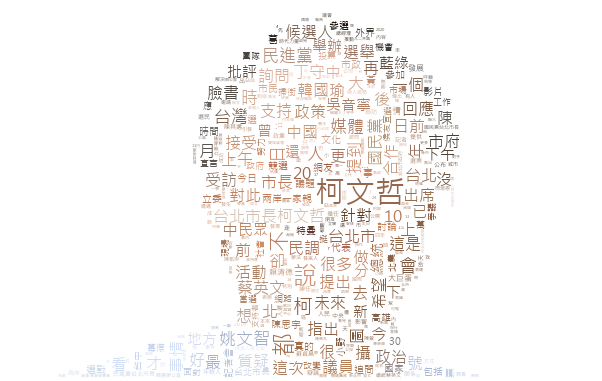

In [20]:
# 柯文哲
kp_wc = get_wordcloud_of_keywords('柯文哲', contents, image_path='../politicians/kp.png')
kp_wc.to_file('../politicians/kpwc.png')
kp_wc.to_image()

In [21]:
news_containing_kp = news_containing_keyword('柯文哲', contents)
kp_dict = get_cutted_dict(news_containing_kp)
first_n_words(kp_dict, 10)

[('柯文哲', 8153),
 ('媒體', 2356),
 ('姚文智', 2120),
 ('台灣', 2117),
 ('民進黨', 2107),
 ('丁守中', 1822),
 ('選舉', 1703),
 ('台北市長柯文哲', 1590),
 ('市長', 1538),
 ('國民黨', 1469)]

43755


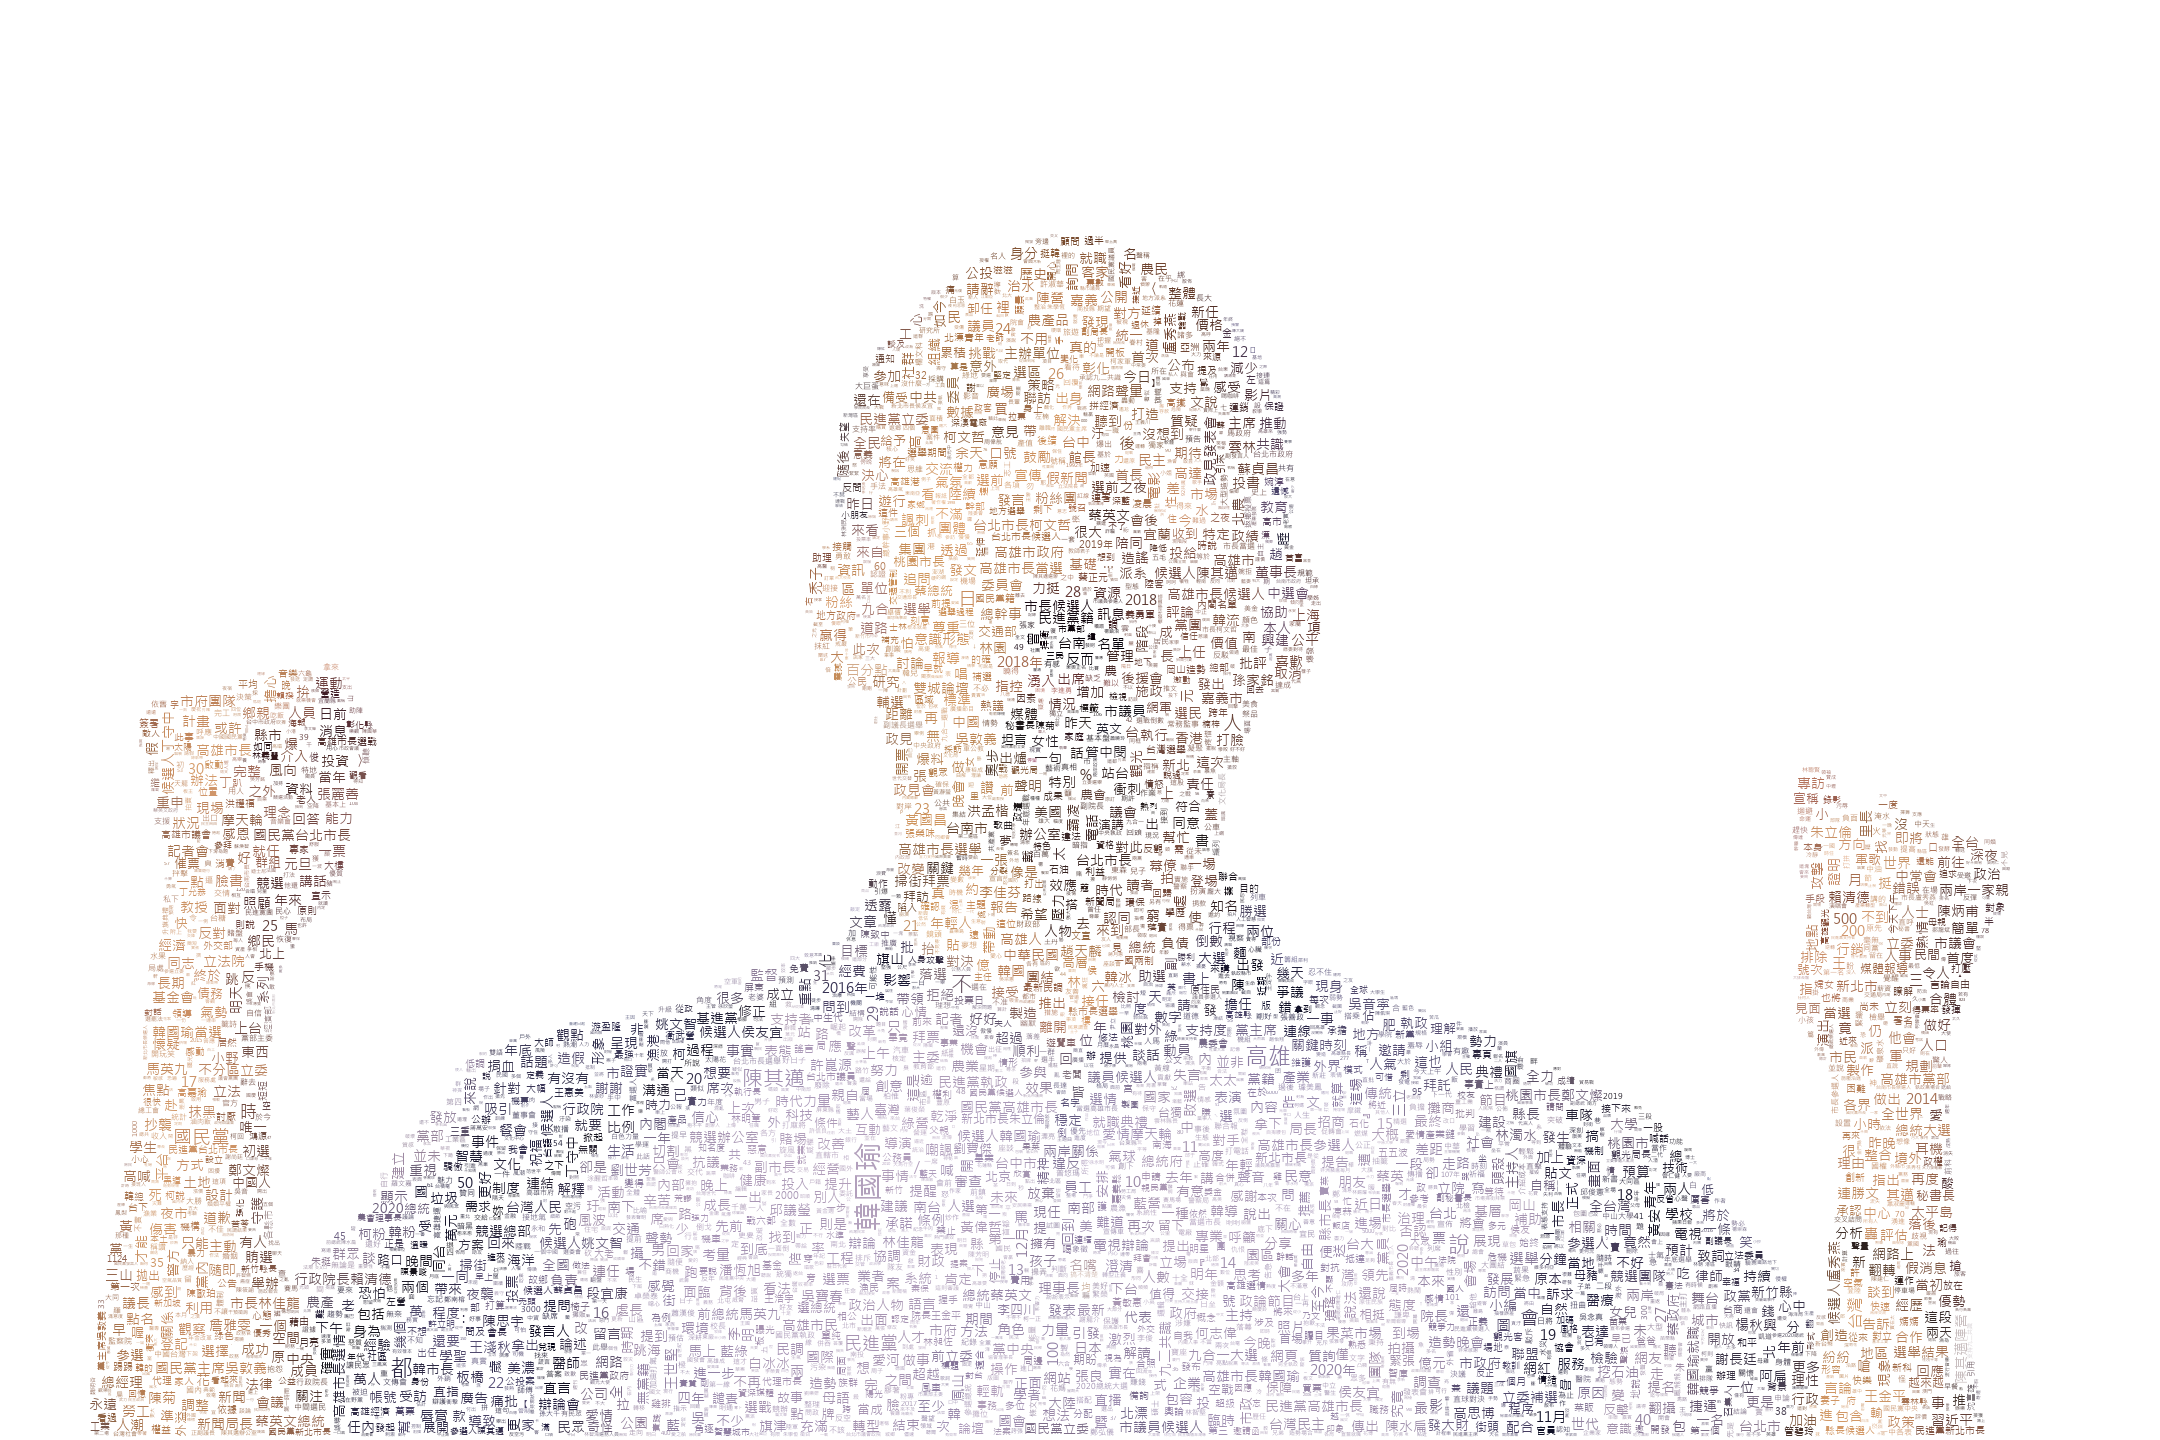

In [22]:
# 韓國瑜
han_wc = get_wordcloud_of_keywords('韓國瑜', contents, '../politicians/han.png')
han_wc.to_file('../politicians/hanwc.png')
han_wc.to_image()

In [23]:
news_containing_han = news_containing_keyword('韓國瑜', contents)
han_dict = get_cutted_dict(news_containing_han)
first_n_words(han_dict, 10)

[('韓國瑜', 6590),
 ('高雄', 3259),
 ('陳其邁', 2644),
 ('國民黨', 2065),
 ('民進黨', 1740),
 ('台灣', 1518),
 ('選舉', 1304),
 ('柯文哲', 1166),
 ('網友', 1138),
 ('媒體', 1036)]

18666


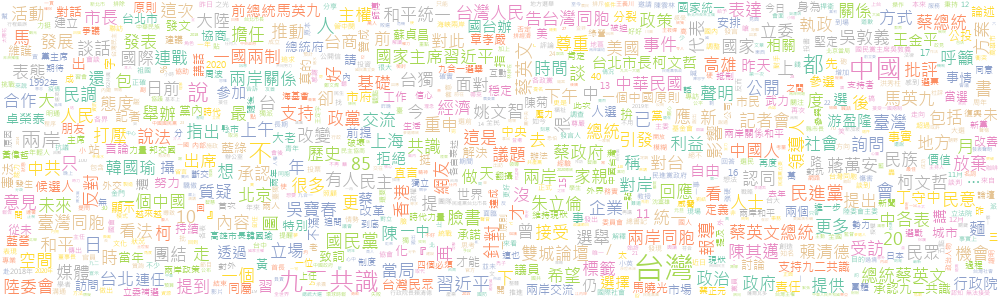

In [24]:
# 九二共識
nt_wc = get_wordcloud_of_keywords('九二共識', contents)
nt_wc.to_file('../politicians/92.png')
nt_wc.to_image()

In [25]:
hot = '九二共識'
news_containing_hot = news_containing_keywords(hot, contents)
hot_dict = get_cutted_dict(news_containing_hot)
first_n_words(hot_dict, 10, 3) # 人名

[('九二共識', 1022),
 ('國民黨', 611),
 ('民進黨', 549),
 ('蔡英文', 483),
 ('習近平', 467),
 ('柯文哲', 400),
 ('韓國瑜', 392),
 ('馬英九', 319),
 ('一國兩制', 301),
 ('吳寶春', 287)]

1303


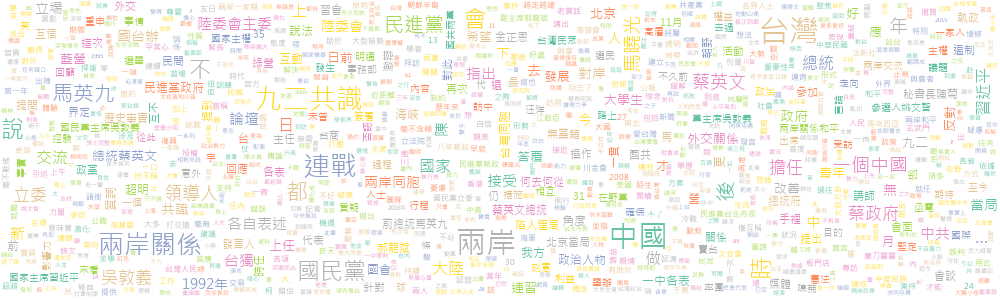

In [26]:
hotwc = get_wordcloud_of_keywords([hot, '蔡英文'], contents[:1000])
hotwc.to_image()

In [27]:
hotP = news_containing_keywords([hot, '蔡英文'], contents)
hotP_dict = get_cutted_dict(hotP)
first_n_words(hotP_dict, 10, 2)

[('台灣', 952),
 ('中國', 739),
 ('九二共識', 655),
 ('蔡英文', 467),
 ('民進黨', 357),
 ('兩岸', 353),
 ('習近平', 337),
 ('國民黨', 286),
 ('一國兩制', 231),
 ('接受', 206)]

In [32]:
# coloring
# pic_path = '../politicians/kp.png'
# kp_coloring = np.array(Image.open(os.path.join(pic_path)))
# kp_coloring_func = ImageColorGenerator(kp_coloring)

# kpwc = WordCloud(max_font_size=30,
               #  background_color="white",
               #  mask=kp_coloring,
               #  color_func=kp_coloring_func,
               #  font_path=font_path,
               #  width=1000, height=1000)

## defining events

In [19]:
def merge_one_day_news_dict(one_day_dict, count='wt', divide = 1):
    all_words = set([word for each_dict in one_day_dict for word in each_dict])
    one_day_wf = {}
    for word in all_words:
        one_day_wf[word] = 0
        for news in one_day_dict:
            if count == 'wt':
                one_day_wf[word] += news.get(word, 0)/divide
            if count == 'occur':
                one_day_wf[word] += bool(news.get(word, 0))/divide
    
    return one_day_wf

In [44]:
date_list = [news['date'] for news in data]
all_date = sorted(list(set(date_list)))
aall_date = [date[5:] for date in all_date]
print (all_date)
print ("--\n")
print (aall_date)
date_index = [date_list.index(each_date) for each_date in all_date]
date_index.append(len(date_list)-1)
number_of_news = [date_index[i+1] - date_index[i]-1 for i in range(len(date_index)-1)]
number_of_terms = [sum([sum(data[ni]['cutted_dict'].values()) for ni in range(date_index[i], date_index[i+1])]) for i in range(len(date_index)-1)]

['2018-06-07', '2018-06-08', '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24', '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16', '2018

In [54]:
# 每日詞數
wn_by_day = {}
for i in range(len(date_index)-1):
    oneday_news = data[date_index[i]: date_index[i+1]]
    oneday_dict = [news['cutted_dict'] for news in oneday_news]
    current_word_dict = merge_one_day_news_dict(oneday_dict)
#     print(all_date[i])
    wn_by_day[all_date[i]] = current_word_dict
    #print (wn_by_day[all_date[i]])

In [55]:
# 每日詞頻
tf_by_day = {}
for i in range(len(date_index)-1):
    oneday_news = data[date_index[i]: date_index[i+1]]
    oneday_dict = [news['cutted_dict'] for news in oneday_news]
    current_word_dict = merge_one_day_news_dict(oneday_dict, divide=number_of_terms[i])
#     print(all_date[i])
    tf_by_day[all_date[i]] = current_word_dict

In [56]:
# 每天出現的字
occur_by_day = {}
for i in range(len(date_index)-1):
    oneday_news = data[date_index[i]: date_index[i+1]]
    oneday_dict = [news['cutted_dict'] for news in oneday_news]
    current_word_dict = merge_one_day_news_dict(oneday_dict, count='occur', divide=number_of_news[i])
#     print(all_date[i])
    occur_by_day[all_date[i]] = current_word_dict

In [57]:
def first_n_wf_by_day(wf_by_day, n, word_len=2, to=1000):
    return {day: dict(first_n_words(wf_by_day[day], n, word_len=word_len, to=to)) for day in wf_by_day}

In [42]:
first_10_wf_by_day = first_n_wf_by_day(tf_by_day, 10, 2)
first_5_wf_by_day = first_n_wf_by_day(tf_by_day, 5, 2)

In [50]:
df1 = pd.DataFrame(first_10_wf_by_day)
df2 = pd.DataFrame(first_5_wf_by_day)
# print
df2

2018-06-07  2018-06-08  2018-06-09  2018-06-10  2018-06-11  2018-06-12  \
10            NaN         NaN         NaN    0.004425         NaN         NaN   
11            NaN         NaN         NaN         NaN    0.003495         NaN   
12            NaN         NaN         NaN         NaN         NaN         NaN   
13            NaN         NaN         NaN         NaN         NaN         NaN   
14            NaN         NaN         NaN         NaN         NaN         NaN   
15            NaN         NaN         NaN         NaN         NaN         NaN   
16            NaN         NaN         NaN         NaN         NaN         NaN   
17            NaN         NaN         NaN         NaN         NaN         NaN   
18            NaN         NaN         NaN         NaN         NaN         NaN   
19            NaN         NaN         NaN         NaN         NaN         NaN   
20            NaN         NaN         NaN         NaN         NaN         NaN   
21            NaN         NaN         NaN         NaN         NaN         NaN   
23            NaN         NaN         NaN         NaN         NaN         NaN   
24            NaN         NaN         NaN         NaN         NaN         NaN   
25            NaN         NaN         NaN         NaN         NaN         NaN   
26            NaN         NaN         NaN         NaN         NaN         NaN   
27            NaN         NaN         NaN         NaN         NaN         NaN   
28            NaN         NaN         NaN         NaN         NaN         NaN   
29            NaN         NaN         NaN         NaN         NaN         NaN   
30            NaN         NaN         NaN         NaN         NaN         NaN   
31            NaN         NaN         NaN         NaN         NaN         NaN   
85            NaN         NaN         NaN         NaN         NaN         NaN   
一個            NaN         NaN         NaN         NaN         NaN         NaN   
丁丁            NaN         NaN         NaN         NaN         NaN         NaN   
丁守中           NaN         NaN         NaN         NaN         NaN         NaN   
不分區立委         NaN         NaN         NaN         NaN         NaN         NaN   
中國            NaN    0.003499         NaN         NaN         NaN    0.004163   
中興新村          NaN         NaN         NaN         NaN         NaN         NaN   
中選會           NaN         NaN         NaN         NaN         NaN         NaN   
主委            NaN         NaN         NaN         NaN         NaN         NaN   
...           ...         ...         ...         ...         ...         ...   
開票            NaN         NaN         NaN         NaN         NaN         NaN   
間諜            NaN         NaN         NaN         NaN         NaN         NaN   
阿帕契           NaN         NaN         NaN         NaN         NaN         NaN   
陳其邁           NaN         NaN         NaN         NaN         NaN         NaN   
陳師孟           NaN         NaN         NaN         NaN         NaN         NaN   
陳志強           NaN         NaN         NaN         NaN         NaN         NaN   
陳思宇           NaN         NaN         NaN         NaN         NaN         NaN   
陳文成           NaN         NaN         NaN         NaN         NaN         NaN   
陳菊            NaN         NaN    0.004815         NaN         NaN         NaN   
陳金德           NaN         NaN         NaN         NaN         NaN         NaN   
陸委會           NaN         NaN         NaN         NaN         NaN         NaN   
雙城論壇          NaN         NaN         NaN         NaN         NaN         NaN   
電廠            NaN         NaN         NaN         NaN         NaN         NaN   
韓國瑜           NaN         NaN         NaN         NaN         NaN         NaN   
預算            NaN         NaN         NaN         NaN         NaN         NaN   
颱風            NaN         NaN         NaN         NaN         NaN         NaN   
馬英九           NaN         NaN         NaN         NaN         NaN         NaN   
體育            NaN         NaN         

In [51]:
df = pd.DataFrame(wn_by_day)
df = df.fillna(0)
# print
df

2018-06-07  2018-06-08  2018-06-09  2018-06-10  2018-06-11  \
                     0.0         0.0         0.0         0.0         0.0   
                     0.0         0.0         0.0         0.0         0.0   
\t                    0.0         0.0         0.0         0.0         0.0   
                     1.0         0.0         0.0         0.0         0.0   

                     0.0         0.0         0.0         0.0         0.0   
                     0.0         0.0         0.0         0.0         0.0   
00                    0.0         0.0         0.0         1.0         0.0   
000                   0.0         0.0         0.0         0.0         2.0   
0000                  0.0         0.0         0.0         0.0         0.0   
0001                  0.0         0.0         0.0         0.0         0.0   
0005030960009         0.0         0.0         0.0         0.0         0.0   
001                   0.0         0.0         0.0         0.0         0.0   
0015                  0.0         0.0         0.0         0.0         0.0   
002                   0.0         0.0         0.0         0.0         0.0   
003                   0.0         0.0         0.0         0.0         0.0   
0039                  0.0         0.0         0.0         0.0         0.0   
0040                  0.0         0.0         0.0         0.0         0.0   
005                   0.0         0.0         0.0         0.0         0.0   
0057                  0.0         0.0         0.0         0.0         0.0   
007                   0.0         0.0         0.0         0.0         0.0   
008                   0.0         0.0         0.0         0.0         0.0   
009                   0.0         0.0         0.0         0.0         0.0   
01                    0.0         0.0         0.0         0.0         0.0   
010                   0.0         0.0         0.0         0.0         0.0   
011                   0.0         0.0         0.0         0.0         0.0   
0127                  0.0         0.0         0.0         0.0         0.0   
014                   0.0         0.0         0.0         0.0         0.0   
016                   0.0         0.0         0.0         0.0         0.0   
0165                  0.0         0.0         0.0         0.0         0.0   
0166                  0.0         0.0         0.0         0.0         0.0   
...                   ...         ...         ...         ...         ...   
Ｎ                     0.0         0.0         0.0         0.0         0.0   
Ｏ                     0.0         0.0         0.0         0.0         0.0   
Ｐ                     0.0         0.0         0.0         0.0         0.0   
Ｑ                     0.0         0.0         0.0         0.0         0.0   
Ｒ                     0.0         0.0         0.0         0.0         0.0   
Ｓ                     0.0         0.0         0.0         0.0         0.0   
Ｔ                     0.0         0.0         0.0         0.0         0.0   
Ｕ                     0.0         0.0         0.0         0.0         0.0   
Ｖ                     0.0         0.0         0.0         0.0         0.0   
Ｗ                     0.0         0.0         0.0         0.0         0.0   
Ｘ                     0.0         0.0         0.0         0.0         0.0   
Ｙ                     0.0         0.0         0.0         0.0         0.0   
Ｚ                     0.0         0.0         0.0         0.0         0.0   
［                     0.0         0.0         0.0         0.0         0.0   
］                     0.0         0.0         0.0         0.0         0.0   
＿                     0.0         0.0         0.0         0.0         0.0   
ａ                     0.0         0.0         0.0         0.0         0.0   
ｂ                     0.0         0.0         0.0         0.0         0.0   
ｅ                     0.0         0.0         0.0         0.0         0.0   
ｋ                     0.0         0.0         0.0         0.0         0.0   
ｍ          

In [60]:
df_tf = pd.DataFrame(tf_by_day)
df_tf = df_tf.fillna(0)
# print
df_tf

2018-06-07  2018-06-08  2018-06-09  2018-06-10  2018-06-11  \
                0.000000         0.0         0.0    0.000000    0.000000   
                0.000000         0.0         0.0    0.000000    0.000000   
\t               0.000000         0.0         0.0    0.000000    0.000000   
                0.000542         0.0         0.0    0.000000    0.000000   

                0.000000         0.0         0.0    0.000000    0.000000   
                0.000000         0.0         0.0    0.000000    0.000000   
00               0.000000         0.0         0.0    0.000221    0.000000   
000              0.000000         0.0         0.0    0.000000    0.000206   
0000             0.000000         0.0         0.0    0.000000    0.000000   
0001             0.000000         0.0         0.0    0.000000    0.000000   
0005030960009    0.000000         0.0         0.0    0.000000    0.000000   
001              0.000000         0.0         0.0    0.000000    0.000000   
0015             0.000000         0.0         0.0    0.000000    0.000000   
002              0.000000         0.0         0.0    0.000000    0.000000   
003              0.000000         0.0         0.0    0.000000    0.000000   
0039             0.000000         0.0         0.0    0.000000    0.000000   
0040             0.000000         0.0         0.0    0.000000    0.000000   
005              0.000000         0.0         0.0    0.000000    0.000000   
0057             0.000000         0.0         0.0    0.000000    0.000000   
007              0.000000         0.0         0.0    0.000000    0.000000   
008              0.000000         0.0         0.0    0.000000    0.000000   
009              0.000000         0.0         0.0    0.000000    0.000000   
01               0.000000         0.0         0.0    0.000000    0.000000   
010              0.000000         0.0         0.0    0.000000    0.000000   
011              0.000000         0.0         0.0    0.000000    0.000000   
0127             0.000000         0.0         0.0    0.000000    0.000000   
014              0.000000         0.0         0.0    0.000000    0.000000   
016              0.000000         0.0         0.0    0.000000    0.000000   
0165             0.000000         0.0         0.0    0.000000    0.000000   
0166             0.000000         0.0         0.0    0.000000    0.000000   
...                   ...         ...         ...         ...         ...   
Ｎ                0.000000         0.0         0.0    0.000000    0.000000   
Ｏ                0.000000         0.0         0.0    0.000000    0.000000   
Ｐ                0.000000         0.0         0.0    0.000000    0.000000   
Ｑ                0.000000         0.0         0.0    0.000000    0.000000   
Ｒ                0.000000         0.0         0.0    0.000000    0.000000   
Ｓ                0.000000         0.0         0.0    0.000000    0.000000   
Ｔ                0.000000         0.0         0.0    0.000000    0.000000   
Ｕ                0.000000         0.0         0.0    0.000000    0.000000   
Ｖ                0.000000         0.0         0.0    0.000000    0.000000   
Ｗ                0.000000         0.0         0.0    0.000000    0.000000   
Ｘ                0.000000         0.0         0.0    0.000000    0.000000   
Ｙ                0.000000         0.0         0.0    0.000000    0.000000   
Ｚ                0.000000         0.0         0.0    0.000000    0.000000   
［                0.000000         0.0         0.0    0.000000    0.000000   
］                0.000000         0.0         0.0    0.000000    0.000000   
＿                0.000000         0.0         0.0    0.000000    0.000000   
ａ                0.000000         0.0         0.0    0.000000    0.000000   
ｂ                0.000000         0.0         0.0    0.000000    0.000000   
ｅ                0.000000         0.0         0.0    0.000000    0.000000   
ｋ                0.000000         0.0         0.0    0.000000    0.000000   
ｍ          

In [58]:
df_occur = pd.DataFrame(occur_by_day)
df_occur = df_occur.fillna(0)
# print
df_occur

2018-06-07  2018-06-08  2018-06-09  2018-06-10  2018-06-11  \
                   0.000         0.0         0.0    0.000000    0.000000   
                   0.000         0.0         0.0    0.000000    0.000000   
\t                  0.000         0.0         0.0    0.000000    0.000000   
                   0.125         0.0         0.0    0.000000    0.000000   

                   0.000         0.0         0.0    0.000000    0.000000   
                   0.000         0.0         0.0    0.000000    0.000000   
00                  0.000         0.0         0.0    0.052632    0.000000   
000                 0.000         0.0         0.0    0.000000    0.027778   
0000                0.000         0.0         0.0    0.000000    0.000000   
0001                0.000         0.0         0.0    0.000000    0.000000   
0005030960009       0.000         0.0         0.0    0.000000    0.000000   
001                 0.000         0.0         0.0    0.000000    0.000000   
0015                0.000         0.0         0.0    0.000000    0.000000   
002                 0.000         0.0         0.0    0.000000    0.000000   
003                 0.000         0.0         0.0    0.000000    0.000000   
0039                0.000         0.0         0.0    0.000000    0.000000   
0040                0.000         0.0         0.0    0.000000    0.000000   
005                 0.000         0.0         0.0    0.000000    0.000000   
0057                0.000         0.0         0.0    0.000000    0.000000   
007                 0.000         0.0         0.0    0.000000    0.000000   
008                 0.000         0.0         0.0    0.000000    0.000000   
009                 0.000         0.0         0.0    0.000000    0.000000   
01                  0.000         0.0         0.0    0.000000    0.000000   
010                 0.000         0.0         0.0    0.000000    0.000000   
011                 0.000         0.0         0.0    0.000000    0.000000   
0127                0.000         0.0         0.0    0.000000    0.000000   
014                 0.000         0.0         0.0    0.000000    0.000000   
016                 0.000         0.0         0.0    0.000000    0.000000   
0165                0.000         0.0         0.0    0.000000    0.000000   
0166                0.000         0.0         0.0    0.000000    0.000000   
...                   ...         ...         ...         ...         ...   
Ｎ                   0.000         0.0         0.0    0.000000    0.000000   
Ｏ                   0.000         0.0         0.0    0.000000    0.000000   
Ｐ                   0.000         0.0         0.0    0.000000    0.000000   
Ｑ                   0.000         0.0         0.0    0.000000    0.000000   
Ｒ                   0.000         0.0         0.0    0.000000    0.000000   
Ｓ                   0.000         0.0         0.0    0.000000    0.000000   
Ｔ                   0.000         0.0         0.0    0.000000    0.000000   
Ｕ                   0.000         0.0         0.0    0.000000    0.000000   
Ｖ                   0.000         0.0         0.0    0.000000    0.000000   
Ｗ                   0.000         0.0         0.0    0.000000    0.000000   
Ｘ                   0.000         0.0         0.0    0.000000    0.000000   
Ｙ                   0.000         0.0         0.0    0.000000    0.000000   
Ｚ                   0.000         0.0         0.0    0.000000    0.000000   
［                   0.000         0.0         0.0    0.000000    0.000000   
］                   0.000         0.0         0.0    0.000000    0.000000   
＿                   0.000         0.0         0.0    0.000000    0.000000   
ａ                   0.000         0.0         0.0    0.000000    0.000000   
ｂ                   0.000         0.0         0.0    0.000000    0.000000   
ｅ                   0.000         0.0         0.0    0.000000    0.000000   
ｋ                   0.000         0.0         0.0    0.000000    0.000000   
ｍ          

In [93]:
# word times
plt.figure(figsize=(20,6))
plt.plot(aall_date[147:], df.loc['蔡英文']['2018-11-01':], label='蔡英文')
plt.xticks(list(range(0, 80, 4)), [aall_date[-150::-1][i] for i in range(0, 80, 4)])
plt.show()

ValueError: could not convert string to float: '11-01'

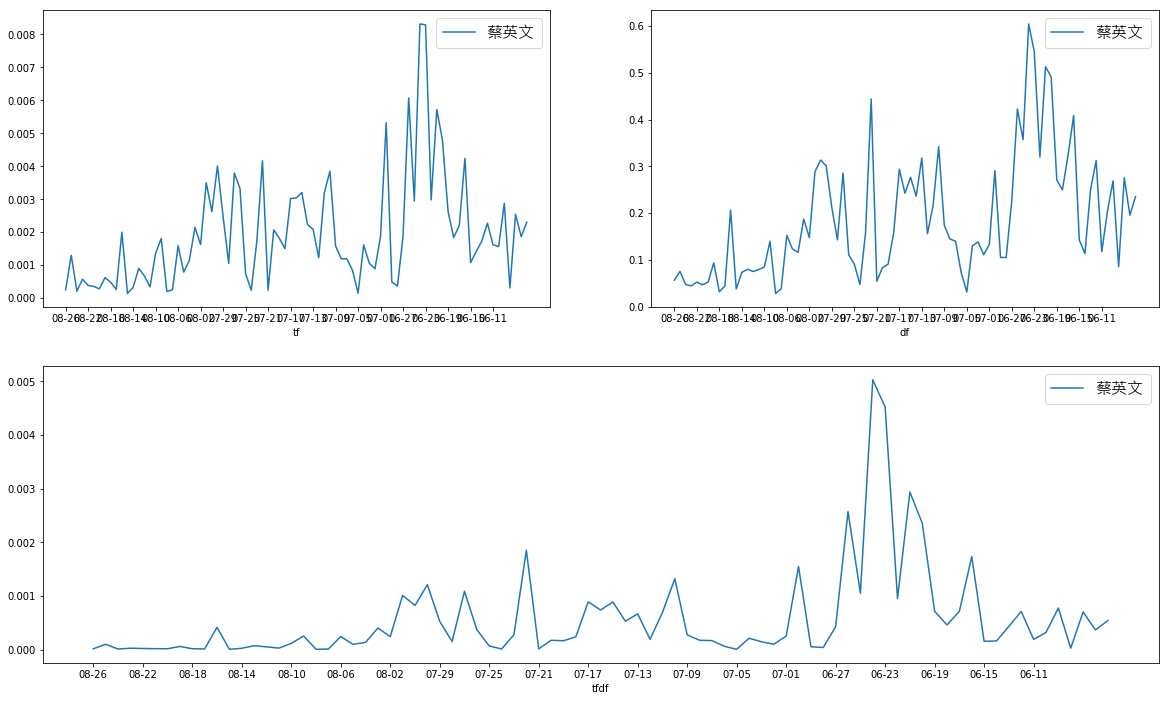

In [67]:
plt.figure(figsize=(20,12))

font = font_manager.FontProperties(fname='msjh.ttc',
                               weight='bold',
                               style='normal', size=16)

plt.subplot(221)
plt.plot(aall_date[147:], df_tf.loc['蔡英文']['2018-11-01':], label='蔡英文')
plt.xticks(list(range(0, 80, 4)), [aall_date[-150::-1][i] for i in range(0, 80, 4)])
plt.legend(prop=font)
plt.xlabel('tf')

plt.subplot(222)
plt.plot(aall_date[147:], df_occur.loc['蔡英文']['2018-11-01':], label='蔡英文')
plt.xticks(list(range(0, 80, 4)), [aall_date[-150::-1][i] for i in range(0, 80, 4)])
plt.legend(prop=font)
plt.xlabel('df')

plt.subplot(212)
plt.plot(aall_date[147:], df_occur.loc['蔡英文']['2018-11-01':]*df_tf.loc['蔡英文']['2018-11-01':], label='蔡英文')
plt.xticks(list(range(0, 80, 4)), [aall_date[-150::-1][i] for i in range(0, 80, 4)])
plt.legend(prop=font)
plt.xlabel('tfdf')

plt.show()

In [94]:
def plot_line_of_word(word, date_from='2018-06-07', date_to='2019-01-22'):
    from_index = df.columns.get_loc(date_from)
    to_index = df.columns.get_loc(date_to)+1
    date_length = to_index-from_index
    date_int = date_length//25
    # modify fname's directory
    font = font_manager.FontProperties(fname='../msjh.ttc',
                                   weight='bold',
                                   style='normal', size=16)
    
    plt.plot(aall_date[from_index:to_index], df.loc[word][date_from:date_to], '-o', label=word)
    plt.legend(prop=font)
    plt.xticks(list(range(0, date_length, date_int)), [aall_date[from_index:to_index][i] for i in range(0, date_length, date_int)])
    
def plot_tfdf_of_word(word, date_from='2018-06-07', date_to='2019-01-22'):
    from_index = df.columns.get_loc(date_from)
    to_index = df.columns.get_loc(date_to)+1
    date_length = to_index-from_index
    date_int = date_length//25
    # modify fname's directory
    font = font_manager.FontProperties(fname='../msjh.ttc',
                                   weight='bold',
                                   style='normal', size=16)
    
    plt.plot(aall_date[from_index:to_index], 
             df_tf.loc[word][date_from:date_to]*df_occur.loc[word][date_from:date_to], '-o', label=word)
    plt.legend(prop=font)
    plt.xticks(list(range(0, date_length, date_int)), [aall_date[from_index:to_index][i] for i in range(0, date_length, date_int)])


In [95]:
plt.figure(figsize=(20,6))
# plot_line_of_word('九二共識', date_from='2018-11-01', date_to='2019-01-01')
# plot_line_of_word('蔡英文', date_from='2018-11-01', date_to='2019-01-01')

plot_tfdf_of_word('九二共識', date_from='2018-11-01', date_to='2019-01-01')
plot_tfdf_of_word('蔡英文', date_from='2018-11-01', date_to='2019-01-01')

plt.grid()
plt.show()

ValueError: could not convert string to float: '11-01'

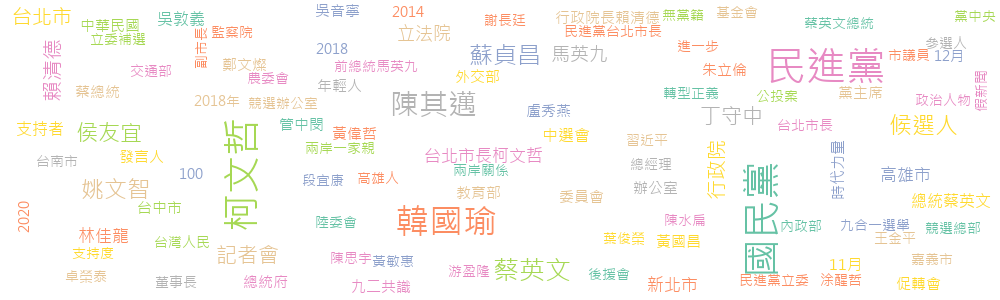

In [73]:
hot3 = first_n_words(cutted_dict, 100, 3)
hot3l = [x[0] for x in hot3]
wc.generate_from_frequencies(dict(hot3)).to_image()

In [74]:
def get_tfdf(word):
    tfdf = df_occur.loc[word] * df_tf.loc[word]
    return tfdf

In [51]:
def get_high_tfdf_date(word):
    tfdf = df_occur.loc[word] * df_tf.loc[word]
    m = statistics.mean(tfdf)
    s = statistics.stdev(tfdf)
    tfdf_bool = [x > m+s for x in tfdf]
    tfdf_date = {all_date[x[0]]: tfdf[x[0]] for x in list(filter(lambda e: e[1], enumerate(tfdf_bool)))}
    return tfdf_date

In [80]:
hot3 = [x[0] for x in first_n_words(cutted_dict, 100, 3, 3)]
hot3
hot3_date = {word: get_high_tfdf_date(word) for word in hot3}
#print (hot3_date)

In [81]:
def keyword_with_event(keyword):
    news_containing_key = news_containing_keyword(keyword, contents)
    key_dict = get_cutted_dict(news_containing_key)
    key_term = first_n_words(key_dict, 300)
    return list(filter(lambda x: x in hot4, [x[0] for x in key_term]))


In [48]:
def draw_event(event, i):
    event_date = get_high_tfdf_date(event)
    date_index = [all_date.index(x) for x in event_date.keys()]
    plt.scatter(date_index, [i for x in date_index], s=[x*100000 for x in list(event_date.values())])
    
def draw_by_list(tf_list, i):
    plt.scatter(aall_date, [i for x in aall_date], s=[x*10 for x in tf_list])

In [61]:
event_high_tfdf_dict = {e: get_high_tfdf_date(e) for e in events}

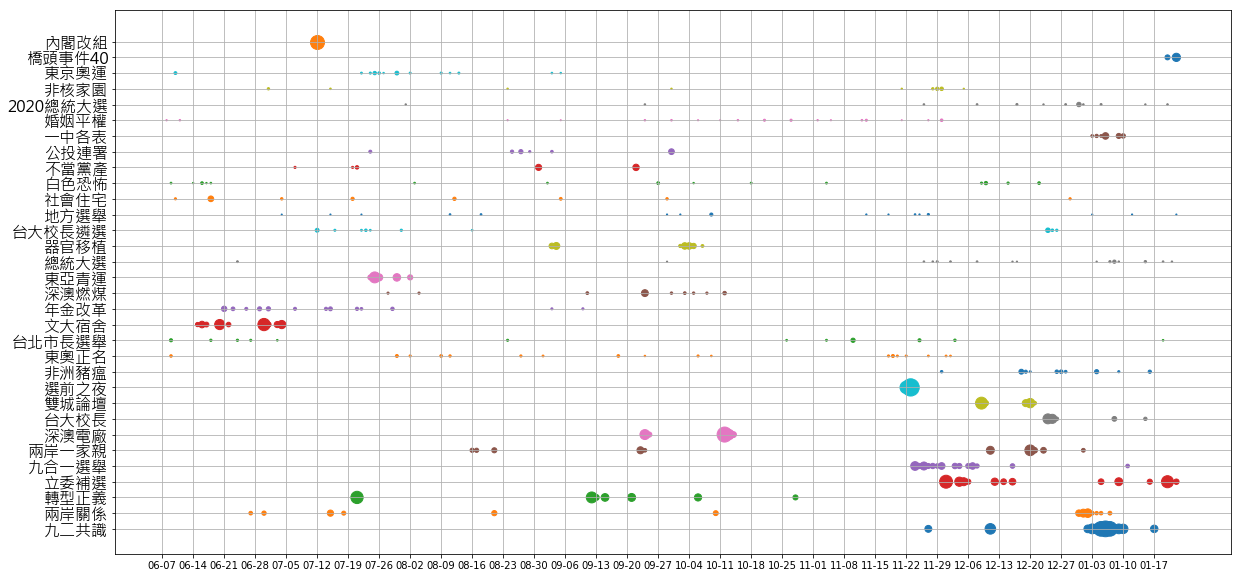

In [63]:
plt.figure(figsize=(20, 10))
for (i, e) in enumerate(events):
    draw_event(e, i)
# plt.xticks(range(0, 230), all_date)
plt.xticks(list(range(0, 230, 7)), [aall_date[i] for i in range(0, 230, 7)])
plt.yticks(range(0, 32), events, fontproperties=font)

plt.grid()
plt.show()

In [64]:
# each event with tfdf of related people
event_people_dict = {}
for event in events:
    event_data = data_containing_keyword(event, data)
    # event_data[0]
    print (event_data[0])
    print ("--\n")
    name_times_of_date = {}
    for date in all_date:
        oneday_data = list(filter(lambda data: data['date']==date, event_data))
        oneday_dict = [news['cutted_dict'] for news in oneday_data]
        current_word_dict = merge_one_day_news_dict(oneday_dict, 'wt', divide=len(oneday_data))
        possible_name = first_n_words(current_word_dict, 10000, 3, 3)
        name_times_of_date[date]= list(filter(lambda x: x[0] in names, possible_name))

    all_names = set([name for name_list in name_times_of_date.values() for (name, times) in name_list])
    event_people_dict[event] = {name: [dict(name_times_of_date[date]).get(name, 0) for date in all_date] for name in all_names}
    
with open('event_people_dict.json', 'w', encoding='utf-8') as j:
    json.dump(event_people_dict, j)

{'date': '2018-06-08', 'link': 'https://newtalk.tw/news/view/2018-06-08/127225', 'content': "今年的兩岸論壇進展緩慢，海峽論壇的重要性因而提升。國民黨副主席郝龍斌日前在黨主席吳敦義的授權下，率團赴中參加海峽論壇，會中拋出「新三通」、「兩岸一家人」等言論。與會藍委認為此次成果助於「緩解近日國共緊張關係」，另一名與會者表示，這次各省也陸續頒布因應惠台31項措施的配套方案。國民黨與共產黨間一年一度的論壇，自2006年起連續舉辦11年，去年首度中斷，外界分析成行與否在於國共兩黨間的互信不足，北京當局對於吳敦義宣稱堅持「九二共識」，卻一直強調「一中各表」多有疑慮。趕在海峽論壇開幕前，吳敦義引述 《憲法增修條文》「最終目的是國家統一為原則」，現階段「自由地區」可全面改選民代。外界解讀是為了化解中國的憂慮。今年國民黨副主席郝龍斌在黨主席吳敦義的授權下，率團赴中參加海峽論壇，會中拋出「照顧台生、台胞、兩岸配偶的新三通」、「兩岸從一家親變成一家人」等言論，談論到敏感的兩岸關係時，郝強調，過去國民黨8年執政能有兩岸關係榮景，主要就是奠定在「九二共識」與「反對台獨」的基礎。詢及這是否意味著「一中各表」已被置換成「反對台獨」，郝龍斌表示，他和全國政協主席汪洋、國台辦主任劉結一私下會談時，都有表達「一中各表」含意對台灣的重要性，甚至還回顧當年的國統綱領內容，而汪洋當場表示「可以理解」。與會者表示，繼中國頒布惠台31項措施後，中國各省也依序提出配套，比如廈門就提出61條方案、上海也有公布55條方案。他指出，蔡英文總統日前對中國喊出不再忍讓，在兩岸關係最艱困時刻，國民黨戮力為台灣人民爭取權益，進到在野黨的責任，讓兩岸交流持續下去。與會藍委說，汪洋基本上能接受郝龍斌對於兩岸關係的談話，當時汪聽聞郝的言論後，也重覆「兩岸一家人」、「九二共識、反對台獨」內容，代表國共兩黨應該會有「新的發展」，相信國共兩黨自海峽論壇後，互通的管道將變得更為熱絡，透過國共新關係，助於緩解國共緊張關係。國民黨政策會執行長林德福也提到，在與台商互動交流後，他們也向中國反映，台商希望能夠加速上市（櫃）速度。他說，郝龍斌也特別向中國說，希望能有實質對台商有助益的措施。 \r          (function(d,a){d[a]=d[a

In [65]:
# event_people_dict = dict(sorted(event_people_dict.items(), key=lambda x: sum(x[1]), reverse=True)[:10])

plt.figure(figsize=(20, 6))

event = list(event_people_dict.keys())[0]
print(event)
for (i, people) in enumerate(event_people_dict[event]):
    draw_by_list(event_people_dict[event][people], i)
    #print ("i=", i)
    #print ("peopel=", people)
    #print ("event=", event)
    #print (event_people_dict[event][people])
    #print ("\n\n")

plt.xticks(list(range(0, 230, 7)), [aall_date[i] for i in range(0, 230, 7)])
plt.yticks(range(0, len(event_people_dict[event])), [people for people in event_people_dict[event]], fontproperties=font)
    
plt.grid()
plt.show()

東奧正名


ValueError: could not convert string to float: '06-07'

In [100]:
people_tfdf_dict = {name: list(get_tfdf(name)) for name in names}
# with open('people_tfdf_dict.json', 'w', encoding='utf-8') as j:
#     json.dump(people_tfdf_dict, j)

In [101]:
font = font_manager.FontProperties(fname='../msjh.ttc',
                                   weight='bold',
                                   style='normal', size=16)

ratio = tfdf_ratio(word)
plt.figure(figsize=(20, 6))
plot_tfdf_of_word(word)
plt.grid()
a = [x*0.00001 for x in ratio]
plt.plot(aall_date, a)
plt.scatter(peak_date, [-0.0005 for i in range(len(peak_date))], c='r')
plt.scatter(tfdf_date, [-0.0003 for i in range(len(tfdf_date))], c='y')
plt.plot(aall_date, [m+s for i in aall_date], 'r-', label='m+s')
plt.plot(aall_date, [0.00005 for i in aall_date], 'g-', label='ratio threshold')

plt.ylim((-0.001, 0.003))
plt.legend(prop=font)
plt.show()

NameError: name 'tfdf_ratio' is not defined

## TFIDF

In [315]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [325]:
ccontents = [remove_punctuation(news) for news in contents]

In [326]:
corpus = [' '.join(jieba.lcut(news)) for news in ccontents]

In [327]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)

In [328]:
pd.DataFrame(tfidf.toarray(), columns=word)

00  000  0000  0001  0005030960009  001  0015  002  003  0039 ...   \
0      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
1      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
2      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
3      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
4      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
5      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
6      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
7      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
8      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
9      0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
11     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
12     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
13     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
14     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
15     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
16     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
17     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
18     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
19     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
20     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
21     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
22     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
23     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
24     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
25     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
26     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
27     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
28     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
29     0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
...    ...  ...   ...   ...            ...  ...   ...  ...  ...   ... ...    
10461  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10462  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10463  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10464  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10465  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10466  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10467  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10468  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10469  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10470  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10471  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10472  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10473  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10474  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10475  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10476  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10477  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10478  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10479  0.0  0.0   0.0   0.0            0.0  0.0   0.0  0.0  0.0   0.0 ...    
10480  0.0  0.0   0.0   0.0   